#  Neural Network

In this jupyter notebook we will focus on $\textit{Neural Netowrks}$ (also called MultiLayer Perceptrons), which is computing system, that is based on biological neural networks that constitute animal brains. 

<img src="Neural_net/neural_net.jpg" height="40%" width="40%">

# Problem
For a given set $D = \{(x_n, y_n)\}_{n=1}^N$ classify $\textit{y}$ for the new $\textbf{x}$. To do it we will have to teach our neural network how to predict the class basing on input data. 

<h3>Example</h3>
Given a dataset from MNIST (set of handwritten digits) we have to predict proper digit according to the input image:
<img src="Neural_net/example.jpg" height="70%" width="70%">

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from tqdm import tqdm_notebook
from matplotlib.gridspec import GridSpec

# Simple example
We want our model to learn if the output is ture of false, according to input data that will represent the xor logical gate, with A and B as inputs and O as output. The xor is a logical gate that gives a true output, when number of true inputs is odd.
<img src="Neural_net/xor.jpg" height="70%" width="70%">


Neural network have to learn itself what weights it has set to the inputs, so it can easliy decide if the output is true or not. For example it can develop weights to detect features like this:

<img src="Neural_net/neural_net_xor.jpeg" height="70%" width="70%">

# Input data
We have to prepare some input data, for example four pairs A, B like in table above, but we will store it in just single variable x, and the output O in variable y. 

In [19]:
def prepare_data():
    X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
    Y = np.array([[0],[1],[1],[0]])
    return X, Y


In [20]:
X, Y = prepare_data()
print('Input shape: {}'.format(X.shape))
print('Output shape: {}'.format(Y.shape))


Input shape: (4, 2)
Output shape: (4, 1)


# Neural Network Model
Our model is a simple neural network with one hidden layer. That consists of input layer, where the "x" is given, hidden layer, and output layer, where we predict 'y'. In each layer there is addidtional node, which is not connected with the previous layer called bias. This neuron allows us to provide some independency between inputs.

<img src="Neural_net/neural_net_bias.jpg" height="40%" width="40%">

# Sigmoid
We are going to use sigmoid non-linear function, that is defined:

$\sigma(x) = \frac{1}{1+e^{-x}}$

And looks like this below:
<img src="Neural_net/sigmoid.jpg" height="40%" width="40%">

We also need to know sigmoid derivative which is equal to:
$\frac{\delta \sigma}{\delta x} = \sigma(x) \cdot (1 - \sigma(x)) $

In [21]:
def sigmoid(x):
    '''
    param x: input matrix of size NxM
    '''
    return 1/(1+np.exp(-x))

In [22]:
print('Sigmoid for small value f.e. -100 equals: {:.3f}'.format(sigmoid(-100)))
print('Sigmoid of big values f.e. 100 equals: {:.3f}'.format(sigmoid(100)))

Sigmoid for small value f.e. -100 equals: 0.000
Sigmoid of big values f.e. 100 equals: 1.000


# Forward pass
Now we are going to implement steps:
1. We are multiplying inputs by weights and adding bias to get $z_1$ values at the hidden layer.
3. On the $z_1$ we are applaying non-linear function to 'activate' the layer.
4. We are multiplying values from the hidden layer by next weights and adding another bias to get $z_2$ value on output layer
6. At the end we need to apply another non-linear function on output layer.

$z_1 = (a_0 \times w_1) + b_1 $

$a_1 = \sigma(z_1) $

$z_2 = (a_1 \times w_2 ) + b_2 $

$a_2 = \sigma(z_2) $

In [23]:
def forward_pass(x, w, b):
    '''
    param x: vector of input training values NxM, where N is the number of examples & M number of features
    param w: tuple of two matrixes, which describes weights between layers
    param b: tuple of two vectors, which describes biases for layers
    returns: function returns cache, which is tuple, that includes values of activated layers.
    '''
    w1, w2 = w # unpacking tuple to single matrixes
    b1, b2 = b # unpacking tuple to single vectors
    
    a0 = x
    
    z1 = (a0 @ w1) + b1
    a1 = sigmoid(z1)
    
    z2 = (a1 @ w2) + b2
    a2 = sigmoid(z2)
    
    cache = (a1, a2)
    
    return cache    

# Cost Function
At start weights are random numbers, so we need to find parameters that will predict output with the smallest error. we are going to search for them using gradient descent, which is a method that allows to reach local minimum by substracting derivatives values from weights.

Before computing the gradient we need to define cost function, which in our case will be mean squared error: 
$J = \frac{1}{2N}\lVert{\textbf{y}} - \overline{\textbf{y}}\rVert_2^2$

The cost function will let us measure how bad our model works. 


$\lVert \textbf{y} - \overline{\textbf{y}}\rVert_2$ is called Norm 2 <br>
In linear algebra, functional analysis, and related areas of mathematics, a norm is a function that assigns a strictly positive length or size to each vector in a vector space
<br>

$\lVert\textbf{x}\rVert_2 = \sqrt[2]{\sum_{n=1}^{N} x_n^2}$

In [24]:
def initialize_random_weights(inputs_amount, hidden_nodes_amount, outputs_amount):
    '''
    param inputs_amount: number of cells in input layer
    param output_amount: number of cells in output layer 
    return: pair of tuples of weights and biases for proper layers
    '''
    np.random.seed(100)

    w1 = np.random.normal(0, 1 / np.sqrt(hidden_nodes_amount), (inputs_amount, hidden_nodes_amount))
    b1 = np.random.normal(0, 1, hidden_nodes_amount)

    w2 = np.random.normal(0, 1 / np.sqrt(outputs_amount), (hidden_nodes_amount, outputs_amount))
    b2 = np.random.normal(0, 1, outputs_amount)

    return (w1, w2), (b1, b2)

In [25]:
#example usage
w, b = initialize_random_weights(inputs_amount = 2, hidden_nodes_amount = 3, outputs_amount=1)

w1, w2 = w
b1, b2 = b

print("W1 (from input layer to hidden layer) shape: {}".format(w1.shape))
print("b1 (bias added to hidden layer) shape: {}".format(b1.shape))
print("W2 (from hidden layer to outputs layer) shape: {}".format(w2.shape))
print("b2 (bias added to outplut layer) shape: {}".format(b2.shape))



W1 (from input layer to hidden layer) shape: (2, 3)
b1 (bias added to hidden layer) shape: (3,)
W2 (from hidden layer to outputs layer) shape: (3, 1)
b2 (bias added to outplut layer) shape: (1,)


# Backpropagation
To make some improvements to our weights we need to compute the error, and then following the chain rule change the parameters as follows:
<h3>Steps of gradeint descent</h3>
1. Compute the cost (the error on our last layer)
2. Compute the error on not activated values $z_2$
3. Compute the gradient on weights $w_2$ and bias $b_2$
4. Compute the error on layer $a_1$
5. Compute the error on not activated values $z_1$
6. compute the gradient on weights $w_1$ and bias $b_1$ 

<h3> How are we going to compute those errors</h3>
We need to compute derivative of our cost function with coressponding to our weights and biases, so after substracting computed values from weights and biases we become closer to minimum of cost function.
<p><i>When the cost function grows the derivative is positive, so substracting it will make a 'step back' in direction of  minimum. 

When the function decreases the derivative is negative, so substracting it will make a 'step forward' in direction of  minimum.

If this is hard to imagine - draw yourself a $x^2$ function and place yourself on the left and right of the minimum, compute derivative and substract it from x.
</i></p>

<h4>Detailed steps of gradient descent using chain rule (for people familiar with calculus) </h4>
1. Compute the cost: $ J = \frac{1}{2N}\lVert{\textbf{y} - \textbf{a}_2}\rVert_2^2$

2. Compute the derivative of cost with respect to  $ a_2 = \space \frac{\delta J}{\delta a_2} = -2 \cdot(y - a_2) $

3. Compute the derivative of cost with respect to $ z_2 = \space \frac{\delta J}{\delta z_2} = \frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} = \frac{\delta J}{\delta a_2} \cdot (a_2 \cdot (1 -a_2)) \space,$because  $ \frac{\delta a_2}{\delta z_2} = a_2 \cdot (1-a_2) \space $ as $a_2$ is the $\sigma(z_2)$

4. 1. Compute the derivative of cost with respect to $ w_2 = \space \frac{\delta J}{\delta w_2} = \frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} \cdot \frac{\delta z_2}{\delta w_2}  =\frac{\delta J}{\delta z_2} \cdot \frac{\delta z_2}{\delta w_2} =  \frac{\delta J}{\delta z_2} \cdot a_1 \space$, beacuse $\frac{\delta z_2}{\delta w_2} = a_1 \space$ as $z_2 = a_1 \cdot w_2 + b_2 $

 2. Compute the derivative of cost with respect to $ b_2 = \space \frac{\delta J}{\delta b_2} = \frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} \cdot \frac{\delta z_2}{\delta b_2}  =\frac{\delta J}{\delta z_2} \cdot \frac{\delta z_2}{\delta b_2} =  \frac{\delta J}{\delta z_2} \cdot 1 \space$, beacuse $\frac{\delta z_2}{\delta b_2} = 1 \space$ as $z_2 = a_1 \cdot w_2 + b_2 $
 3. Compute the derivative of cost with respect to  $ a_1 = \space \frac{\delta J}{\delta a_1} = \frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} \cdot \frac{\delta z_2}{\delta a_1}  =\frac{\delta J}{\delta z_2} \cdot \frac{\delta z_2}{\delta a_1} =  \frac{\delta J}{\delta z_2} \cdot w_2 \space$, beacuse $\frac{\delta z_2}{\delta b_2} = w_2 \space$ as $z_2 = a_1 \cdot w_2 + b_2 $
5. Compute the derivative of cost with respect to $z_1  =\space \frac{\delta J}{\delta z_1} =\frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} \cdot \frac{\delta z_2}{\delta a_1} \cdot \frac{\delta a_1}{\delta z_1} = \frac{\delta J}{\delta a_1} \cdot \frac{\delta a_1}{\delta z_1} = \frac{\delta J}{\delta a_1} \cdot (a_1 \cdot ( 1 - a_1 )), \space $because $\frac{\delta a_1}{\delta z_1} = a_1 \cdot ( 1 - a_1 )$ as $a_1 = \sigma(z_1)$
6. 1. Compute the derivative of cost with respect to $w_1 =\space \frac{\delta J}{\delta w_1} = \frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} \cdot \frac{\delta z_2}{\delta a_1} \cdot \frac{\delta a_1}{\delta z_1} \cdot \frac{\delta z_1}{\delta w_1} = \frac{\delta J}{\delta z_1} \cdot \frac{\delta z_1}{\delta w_1} = \frac{\delta J}{\delta z_1} \cdot a_0, \space $ beacuse $\frac{\delta z_1}{\delta w_1} = a_0, \space$ as $z_1 = a_0 \cdot w_1 + b_1$
  2. Compute the derivative of cost with respect to $b_1 =\space \frac{\delta J}{\delta b_1} = \frac{\delta J}{\delta a_2} \cdot \frac{\delta a_2}{\delta z_2} \cdot \frac{\delta z_2}{\delta a_1} \cdot \frac{\delta a_1}{\delta z_1} \cdot \frac{\delta z_1}{\delta b_1} = \frac{\delta J}{\delta z_1} \cdot \frac{\delta z_1}{\delta b_1} = \frac{\delta J}{\delta z_1} \cdot 1, \space $ because $\frac{\delta z_1}{\delta b_1} = 1, \space$ as $z_1 = a_0 \cdot w_1 + b_1$

We don't need to calculate our derivative with respect to a_0, as this is our input, which we are not going to change. 
Now, when we have our derivatives computed, or rather <b>gradients</b>, as this are operations on matrices. 
In code those operations may bit a lit differ, as we are operating on matrices and sometimes you need to transpose them or compute it in proper order, to make it right. (In matrices $A \times B \neq B \times A$) And we are going to compute the mean gradient over all training examples. 

In [26]:
def backward_pass(x, w, b, y, cache):
    '''
    param x: input matrix of size NxM
    param w: tuple of weights
    param b: tuple of biases
    param y: matrix of size NxO
    param cache: tuple of values in layers a1,a2 from forward propagation
    '''
    w1, w2 = w  # unpacking tuple to single matrixes
    b1, b2 = b  # unpacking tuple to single vectors

    a1, a2 = cache

    N = y.shape[0]

    a0 = x

    dJ_da2 = -2 *(y - a2)
    dJ_dz2 =  dJ_da2 * a2*(1-a2)

    dJ_dw2 = 1/N * a1.T @ dJ_dz2
    dJ_db2 = np.mean(dJ_dz2 * 1, axis=0)

    dJ_da1 = dJ_dz2 @ w2.T
    dJ_dz1 = dJ_da1 * a1 * (1-a1)

    dJ_dw1 = 1/N * a0.T @ dJ_dz1
    dJ_db1 = np.mean(dJ_dz1 * 1, axis=0)


    cache = (dJ_dw1, dJ_dw2), (dJ_db1, dJ_db2)

    return cache

# Training

<h3>Steps for training</h3>
After backpropagation we can update weights and biases by substracting from them those gradients multiplied by hyperparamter called learning rate, which defines how fast our model is learning itself. 

$w_2 := w_2 - learning\_rate \cdot \frac{\delta J}{\delta w_2}$

$b_2 := b_2 - learning\_rate \cdot \frac{\delta J}{\delta b_2}$

$w_1 := w_1 - learning\_rate \cdot \frac{\delta J}{\delta w_1}$

$b_1 := b_1 - learning\_rate \cdot \frac{\delta J}{\delta b_1}$

  0 - Initialize weights and biases with random values

For k times (where k is number of epochs)

 1. Process forward pass to get values at layers
 2. Process backward pass to get error at weighst and biases
 3. Update weights and biases to be closer to Cost function minimum 


In [27]:
def train(x, y, hidden_nodes_amount = 2, epochs = 10000, learning_rate = 1e-3):
    '''
    param x: input data of shape NxM
    
    param y: output data of shape NxO
    
    param hidden_nodes_amount: number of nodes in hidden layer
    
    param epochs: nubmer of epochs
    
    param learning_rate: rate of learning speed
    
    return: funcion return weights, biases, costs
    '''
    
    inputs_amount = x.shape[1]
    
    outputs_amount = y.shape[1]
    
    N = x.shape[0]
    
    costs=[]
    
    w, b = initialize_random_weights(inputs_amount, hidden_nodes_amount, outputs_amount)

    for epoch in tqdm_notebook(range(epochs)):
        #cache is (a1,a2), values in layers
        cache = forward_pass(x, w, b)
        _, a2 = cache
        
        (dw1, dw2), (db1, db2) = backward_pass(x, w, b, y, cache)
        
        cost = np.mean((y-a2)**2/2)
        
        costs.append(cost)

        w1, w2 = w
        b1, b2 = b

        w1 -= dw1
        w2 -= dw2

        b1 -= db1
        b2 -= db2

        w = (w1, w2)
        b = (b1, b2)

    return w,b,costs

# Prediction
Prediction is a single feed forward part for each input, to generate classified output.

In [28]:
def predict(x, w, b):
    '''
    param x: input matrix NxM
    param w: tuple of weights
    param b: tuple of biases
    param threshold_value: decision border
    '''
    w1, w2 = w
    b1, b2 = b
    result = (sigmoid(sigmoid((x @ w1) + b1) @ w2 + b2))
    return result

In [29]:
w, b, _ = train(x=X, y=Y)
prediction = predict(X, w, b)
for i in range(prediction.shape[0]):
    print('Input: {}, Real output: {}, Prediction: {}'.format(X[i], Y[i], prediction[i]))

Input: [0 0], Real output: [0], Prediction: [0.02232028]
Input: [1 0], Real output: [1], Prediction: [0.97502189]
Input: [0 1], Real output: [1], Prediction: [0.97487611]
Input: [1 1], Real output: [0], Prediction: [0.02020577]


# More complicated classification task - MNIST Dataset
Mnist is a popular database of handwritten images created for people who are new to machine learning. There are many courses on the internet that include classification problem using MNIST dataset.

This dataset contains 55000 images and labels. Each image is 28x28 pixels large, but for the purpose of the classification task they are flattened to 784x1 arrays $(28 \cdot 28 = 784)$. Summing up our training set is a matrix of size $[55000, 784]$  = [amount of images, size of image]. Each label is size of $[10, 1]$, beacuse it is in 'one-hot' format. In this format we are using only 'zeros' and single 'one' to represent a number. For instance:

$3_{10} = \begin{bmatrix}0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}_{one\_hot}$ 

$7_{10} = \begin{bmatrix}0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \end{bmatrix}_{one\_hot}$

It is done to ease neural network learning. 

It also contains 5000 test images and labels, which are used for testing purpose. We are going to test results on diffrent set than training to avoid overfitting and get "true" accuracy on new inputs.




<h3>Mnist Data Example</h3>
<img src="Neural_net/mnist_example.jpg" height="70%" width="70%">

Now we are going to download this dataset and split it into test and train sets.



In [30]:
utils.download_mnist('Neural_net\mnist_data')
train_data, test, _ = utils.read_mnist('Neural_net/mnist_data', flatten=True)

train_images, train_labels = train_data
test_images, test_labels = test


print("Training images matrix size: {}".format(train_images.shape))
print("Training labels matrix size: {}".format(train_labels.shape))

print("Testing images matrix size: {}".format(test_images.shape))
print("Testing labels matrix size: {}".format(test_labels.shape))



Neural_net\mnist_data\train-images-idx3-ubyte.gz already exists
Neural_net\mnist_data\train-labels-idx1-ubyte.gz already exists
Neural_net\mnist_data\t10k-images-idx3-ubyte.gz already exists
Neural_net\mnist_data\t10k-labels-idx1-ubyte.gz already exists
Training images matrix size: (55000, 784)
Training labels matrix size: (55000, 10)
Testing images matrix size: (5000, 784)
Testing labels matrix size: (5000, 10)


# Visualisation
Visualisation isn't necessery to the problem, but it helps to understand what are we doing.

In [31]:
def show_few(images):
    '''
    param images: vecotr of images of size 28x28 to plot 
    '''
    ax =[]
    
    fig = plt.figure(figsize=(10, 10))

    gs = GridSpec(2, 4, wspace=0.0, hspace=-0.5)
    for i in range(2):
        for j in range(4):
            ax.append(fig.add_subplot(gs[i,j]))
    for i, axis in enumerate(ax):
        axis.imshow(images[i])

    plt.show()


First 8 images of train data:


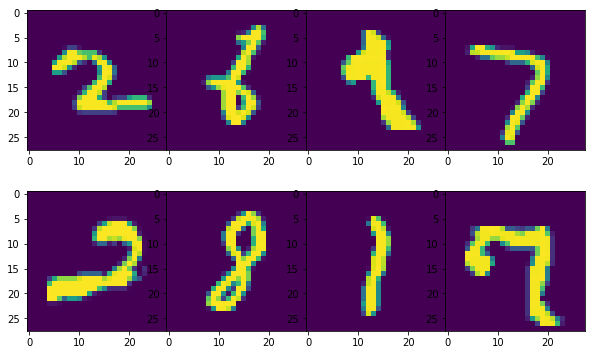

In [32]:
first_8_images = train_images[:8]
resized = np.reshape(first_8_images, (-1,28,28))
print('First 8 images of train data:')
show_few(resized)


# Some intuition

Without neural network you have to perform following steps:
1. Extract features from image
2. Choose and inplement the model
3. Choose and implement learning algorithm
4. (Learn model if necessary) and predict class for the new image with this model

In neural network you can skip some of those, as network learns how to extract features by itslef in hidden layers. You need only to specify its size and hyperparameters (learning rate, regularization, etc.)
<img src="Neural_net/neural_intuition.jpg" height="50%" width="50%">

To provide some more intuition about how is neural network perforing binary classification and extracting features there is another example below:
<img src="Neural_net/neural_intuition2.jpg" height="50%" width="50%">





# Mutliclass classification
In the previous problem we had only 2 classes - True or False in the last node. It was an example of binary classification. In MNIST task we have 10 classes, so in the ouptput layer we need 10 neurons. 
<img src="Neural_net/neural_one_hot.jpg" height="75%" width="75%">


# Accuracy counting
As our model is never returning 1 or 0, due to activation function sigmoid on output layer, we have to find maximum argument, to detect class predicted by network. 

<h3>Example</h3>
$[0.2 ;\space  0.123; \space 0.5] \stackrel{arg\_max}{\implies} [0;\space 0;\space 1]$


In [33]:
def count_accuracy(prediction, y):
    '''
    param prediction: the output of neural network
    param y: the true output values
    '''
    hits = np.argmax(prediction, axis=1) == np.argmax(y, axis = 1)
    
    accuracy = np.mean(hits, axis = 0)
    
    return accuracy
    

Accuracy 90.220 %


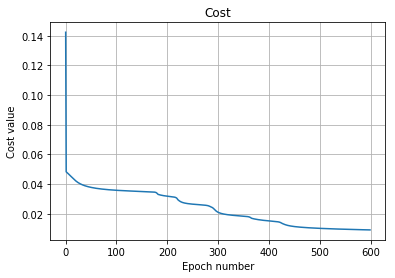

In [35]:
w, b, costs = train(x=train_images, y=train_labels, hidden_nodes_amount = 100, epochs=600, learning_rate=5e-3)
prediction = predict(test_images, w, b)

accuracy = count_accuracy(prediction, test_labels)
print("Accuracy {:.3f} %".format(accuracy * 100))

plt.plot(costs)
plt.xlabel('Epoch number')
plt.ylabel('Cost value')
plt.title('Cost')
plt.grid()
plt.show()

# Conclusion

Accuracy on mnist dataset should be about 90% which is quite poor. To get better results you are supposed to add another hidden layers, or even better - use diffrent types of neural networks like Convolutional Neural Networks. 

If you are intrested in machine learning topic we recommend:

https://www.coursera.org/learn/machine-learning - great introduction to machine learning by Prof. Andrew Ng, unfortunately the course is written in matlab, but provides necessary software. If you don't want to work in matlab, you can still get theoretical background.

https://www.coursera.org/specializations/deep-learning - a next step into deep learning with more details, prepared as well by Prof. Andrew Ng, written in python. 

https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw - a great youtube channel where you can gain essential knowledge of math - linear algebra, calculus and other stuff - especially neural networks. 

# Sources:
Following sources were used to create this notebook:

http://mlg.ii.pwr.edu.pl/sz/#/courses - "Wrocław University of Science and Technology, Szymon Zaręba Ph.D. - neural network intuintion first image 

https://think-data.github.io/machine%20learning/python/2016/12/03/simple-neural-network-using-tensorflow.html - mnist network visualisation with one-hot output layer

https://www.youtube.com/watch?v=BR9h47Jtqyw - neural net intuintion second image (feature extraction)

https://becominghuman.ai/neural-network-xor-application-and-fundamentals-6b1d539941ed - the XOR neural network image

http://www.vlsiinterviewquestions.org/2012/04/17/xor-gate-using-21-mux/ - xor logical gate with table image

https://db-blog.web.cern.ch/ - first example image

http://web.stanford.edu/class/cs20si/syllabus.html - Stanford computer science course with presentation about deep learning

https://github.com/chiphuyen - github of Chip Huyen Stanford lecturer (utils.py)
